In [1]:
import cse
import matplotlib.pyplot as plt
import numpy as np

ev2Ha = 3.67493e-2
cm2Ha = 4.55634e-6
cm2MHz = 2.99792e4
ev2cm = 8065.541
ev2MHz = 2.41799e8
aBohr = 0.52917721067

sr0u = cse.Cse('88Sr', VT=['../potentials/srVZ.dat'])
sr1u = cse.Cse('88Sr', VT=['../potentials/srVY.dat'])

sr0u.VT[0,0] = (sr0u.VT[0,0] - sr1u.VT[0,0].min())/ev2cm # align their asymptotes
sr1u.VT[0,0] = (sr1u.VT[0,0] - sr1u.VT[0,0].min())/ev2cm

In [2]:
sr1u.solve(sr1u.VT[0,0,-1] - 1/ev2MHz)
wf0 = sr1u.wavefunction[:, 0]
en0 = sr1u.energy
(en0 - sr1u.VT[0, 0, -1])*ev2MHz

20.53637206327347

In [3]:
sr1u.solve(sr1u.VT[0,0,-1] - 54/ev2MHz)
wf2 = sr1u.wavefunction[:, 0]
en2 = sr1u.energy
(en2 - sr1u.VT[0, 0, -1])*ev2MHz

-249.70197712815295

In [4]:
sr1u.solve(sr1u.VT[0,0,-1] - 1470/ev2MHz)
wf3 = sr1u.wavefunction[:, 0]
en3 = sr1u.energy
(en3 - sr1u.VT[0, 0, -1])*ev2MHz

-3549.2358093019875

In [5]:
sr0u.solve(sr0u.VT[0,0,-1] - 50/ev2MHz)
wf1 = sr0u.wavefunction[:, 0]
en1 = sr0u.energy
(en1 - sr0u.VT[0,0,-1])*ev2MHz

121.58054686774462

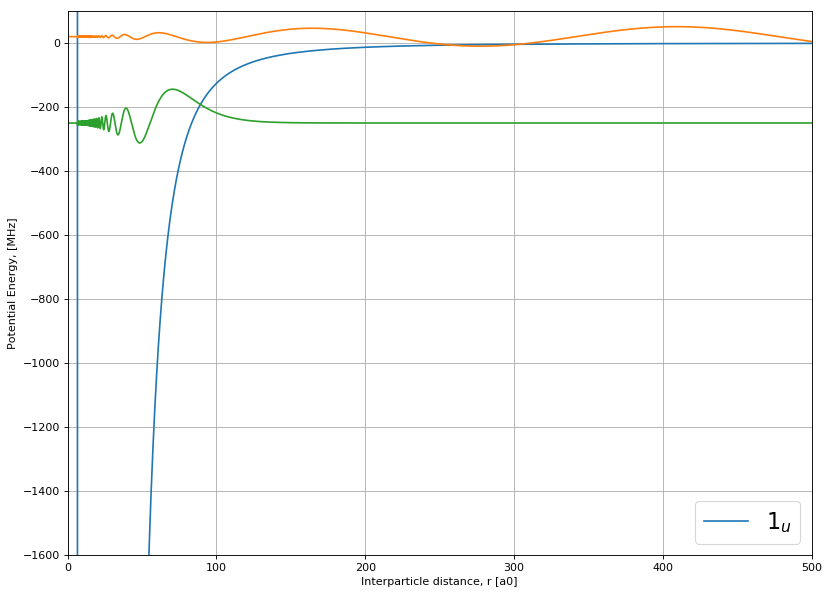

In [6]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

# Potential to plots
V0u = (sr0u.VT[0, 0] - sr0u.VT[0, 0, -1])*ev2MHz
V1u = (sr1u.VT[0,0] - sr1u.VT[0, 0, -1])*ev2MHz

# length
R = sr1u.R/aBohr;

# Wavefunction to plot
A = 400 # arbitrary amplitude factor for visualization
wf1u_1 = -A*wf0 + (en0 - sr1u.VT[0, 0, -1])*ev2MHz
wf1u_2 = A*wf2 + (en2 - sr1u.VT[0, 0, -1])*ev2MHz
wf1u_3 = A*wf3 + (en3 - sr1u.VT[0, 0, -1])*ev2MHz

#plt.plot(R, V0u, label='$0_u^+$')
plt.plot(R, V1u, label='$1_u$')
plt.plot(R, wf1u_1)
plt.plot(R, wf1u_2)
plt.plot(R, wf1u_3)

#plt.axis(xmin=5, xmax=250/aBohr, ymin=-500, ymax=50)
plt.axis(xmin=0, xmax=500, ymin=-1600, ymax=100)
#plt.xscale('log')

plt.xlabel('Interparticle distance, r [a0]')
plt.ylabel('Potential Energy, [MHz]')

plt.rcParams.update({'font.size': 20})
plt.legend(); plt.grid(1); plt.show()

In [20]:
sr1u.results

OrderedDict([(109,
              (3700.4499888238242,
               0.0004199607602217384,
               1.4373360288547732e-06,
               0))])

In [4]:
(en0 - sr1u.VT[0, 0, -1])*ev2MHz

3.4180766728683643

In [12]:
sr1u.VT[0,0,-1]

0.45880116960160694

In [5]:
sr1u


Molecule: 88Sr  mass: 7.29854e-26 kg, 43.9528 amu
Electronic state: ../potentials/srVY.dat

In [6]:
sr0u


Molecule: 88Sr  mass: 7.29854e-26 kg, 43.9528 amu
Electronic state: ../potentials/srVZ.dat

In [ ]:
data = np.column_stack((sr2.R, -1*sr2.wavefunction[:, 0]))
np.savetxt("../data/86sr2_halo.dat", data)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#default value is "last_expr"